<header style="padding:10px;background:#f9f9f9;border-top:3px solid #00b2b1"><img id="Teradata-logo" src="https://www.teradata.com/Teradata/Images/Rebrand/Teradata_logo-two_color.png" alt="Teradata" width="220" align="right" />

## Deep History - Offloading cold historical data to an object store
</header>

### Introduction

Increasingly stringent regulations require companies to keep data online and accessible for regulatory compliance over many years. Although the most frequently accessed data is the latest or most current data, that doesn’t mean that the older information is not useful or relevant. Historical data that’s been compiled over the years gives a rich perspective of the business, such as long-term trends and cyclical patterns.

Teradata Vantage provides unmatched concurrency and performance for the world's largest and most demanding enterprises to analyze their data. Analysis and concurrency needs for older information is generally substantially less as data ages, and over time there is much more history data that accumulates than current 'hot' data, it makes sense to store it somewhere that has different performance and price characteristics: for example an object store such as Amazon S3 or Azure Blob storage.

Keeping historical and current data in separate systems can make it a challenge to gain unique insights that are possible only by analyzing the information together. But not any longer. Now, Teradata Vantage can be used to seamlessly join together all the historical and current information across the data warehouse AND object storage, without having to change the basic data structures and queries. This makes it possible to cost-effectively answer questions that could not be previously addressed so decision makers can better plan for the future.

### Experience

The Experience section takes about 10 minutes to run.

First step is to connect to Vantage. 

In [1]:
%connect local

Password: ········


Success: 'local' connection established and activated for user 'demo_user'


### Accessing the Data
<p style = 'font-size:16px;font-family:Arial'>These demos will work either with foreign tables accessed from Cloud Storage via NOS or you may import the tables to your machine. If you import data for multiple demos, you may need to use the Data Dictionary "Manage Your Space" routine to cleanup tables you no longer need. 
    
<p style = 'font-size:16px;font-family:Arial'>Use the link below to access the 2 options for using data from the data dictionary notebook:

[Click Here to get data for this notebook](../Data_Dictionary/Data_Dictionary.ipynb#TRNG_SalesOffload)

[Click Here to Manage Your Space](../Data_Dictionary/Data_Dictionary.ipynb#Manage_Your_Space)

### Walkthrough

#### Step 1: Querying the Data

Here is our current sales data. Lets grab some sample rows, we can see in this example we have customer, store, basket and discount information.

In [2]:
SELECT TOP 10 * 
FROM TRNG_SalesOffload.sales_fact

,Location,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_7_1.parquet,2019-08-16,545,5,305455,30,8,0.10976
2,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_1_1.parquet,2019-08-19,2753,3,2727533,23,9,0.110169
3,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_1_1.parquet,2019-08-19,2753,3,2727533,80,1,0.0789911
4,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_4_1.parquet,2019-11-09,2027,7,31020277,91,2,0.0107027
5,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_4_1.parquet,2019-11-05,2027,7,31420277,63,3,0.138584
6,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_5_1.parquet,2019-08-20,3087,7,2630877,37,9,0.157746
7,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_5_1.parquet,2019-08-16,3089,9,3030899,6,8,0.121561
8,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_5_1.parquet,2019-08-16,3089,9,3030899,47,9,0.121713
9,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_4_1.parquet,2019-11-17,2027,7,30220277,20,9,0.107858
10,/GS/storage.googleapis.com/demonow_development/TRNG-SalesOffload/sales-fact/object_33_1_1.parquet,2019-08-15,2753,3,3127533,7,4,0.0940131


In [3]:
SELECT sales_date, sum(sales_quantity) as total 
FROM TRNG_SalesOffload.sales_fact
GROUP BY sales_date
ORDER BY sales_date ASC

,sales_date,total
1,2019-01-01,62504
2,2019-01-02,64508
3,2019-01-03,62652
4,2019-01-04,60468
5,2019-01-05,63020
6,2019-01-06,64724
7,2019-01-07,63704
8,2019-01-08,64416
9,2019-01-09,64436
10,2019-01-10,61864


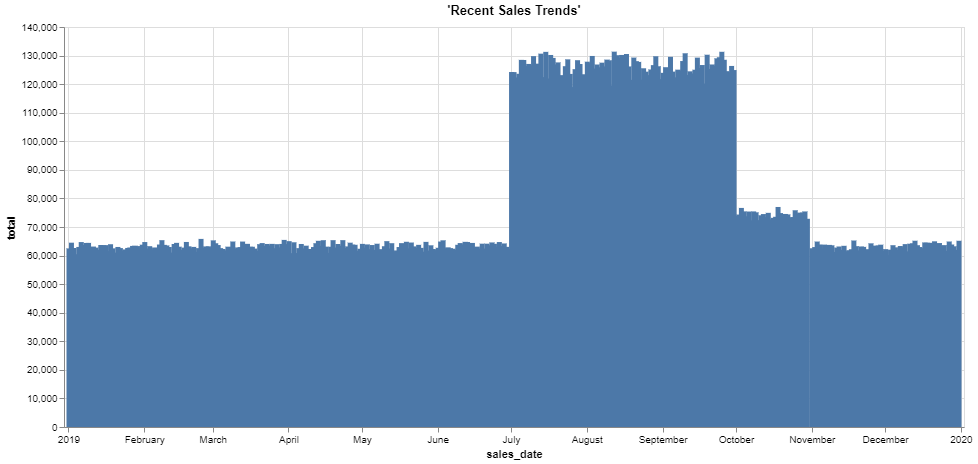

In [4]:
%chart sales_date, total, title='Recent Sales Trends', width=900, height=400

In [5]:
SELECT MIN(sales_date) AS min_date, MAX(sales_date) AS max_date FROM TRNG_SalesOffload.sales_fact

,min_date,max_date
1,2019-01-01,2019-12-31


How many records do we have in the data warehouse (2019 data)?

In [6]:
SELECT COUNT(*)
FROM TRNG_SalesOffload.sales_fact

,Count(*)
1,5238060


#### Step 2: Explore the offloaded historical data

As you have seen we only have 1 year of sales data in our data warehouse as this is by far the most queried, but for compliance many companies need to keep up to 10 years of historical data. The older data has been exported from Vantage on a monthly basis and loaded into Amazon S3 for long term storage. With Teradata Vantage we can seamlessly access this offloaded data and join with the rest of the data to get insights over long term trends and handle audit requests with ease. This includes using existing queries and reports that would otherwise need to be re-written!

We know the bucket where the offloaded sales data is located, so let's take a look at some of the data that is there - using the READ_NOS function we can get the list of files and their sizes.

In [7]:
SELECT location(char(255)), ObjectLength 
FROM read_nos (
ON (select cast(NULL AS DATASET INLINE LENGTH 64000 STORAGE FORMAT CSV))
USING 
 LOCATION  ('/s3/s3.amazonaws.com/trial-datasets/SalesOffload')
 RETURNTYPE ('NOSREAD_KEYS')
) as d 
ORDER BY 1

,Location,ObjectLength
1,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet,771537
2,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/10/object_33_2_1.parquet,532965
3,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/11/object_33_2_1.parquet,741928
4,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/12/object_33_1_1.parquet,802822
5,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/2/object_33_3_1.parquet,659506
6,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/3/object_33_1_1.parquet,809078
7,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/4/object_33_2_1.parquet,738439
8,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/5/object_33_1_1.parquet,744512
9,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/6/object_33_1_1.parquet,756255
10,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/7/object_33_2_1.parquet,1623140


How many files and directories are there total?

In [8]:
SELECT COUNT(location(char(255))) as NumFiles
FROM read_nos (
ON (select cast(NULL AS DATASET INLINE LENGTH 64000 STORAGE FORMAT CSV))
USING 
 LOCATION  ('/s3/s3.amazonaws.com/trial-datasets/SalesOffload')
 RETURNTYPE ('NOSREAD_KEYS')
) as d 
ORDER BY 1

,NumFiles
1,114


Let's take a look at one of the files to get a better understanding of the file format:

In [9]:
SELECT * FROM READ_NOS (
      USING
      LOCATION  ('/s3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet')
      RETURNTYPE ('NOSREAD_PARQUET_SCHEMA')
      FULLSCAN ('TRUE')
      )
AS d

,ColPosition,Name,TdatDataType,PhysicalType,LogicalType,Precision,Scale,MinLength,MaxLength,NullFound,FileType,Location
1,1,TheYear,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
2,2,TheMonth,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
3,3,sales_date,DATE,INT32,DATE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
4,4,customer_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
5,5,store_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
6,6,basket_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
7,7,product_id,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
8,8,sales_quantity,INTEGER,INT32,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet
9,9,discount_amount,FLOAT,DOUBLE,NONE,0,0,0,0,1,parquet,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2010/1/object_33_0_1.parquet


#### Step 3: Create a simple abstraction layer for easy access

Create a foreign table and a view in Vantage to allow business analysts and other users to easily access the offloaded historical data:

Note, you will need to list all the columns in the foreign table definition

In [10]:
CREATE FOREIGN TABLE sales_fact_offload
       (
Location VARCHAR(2048) CHARACTER SET UNICODE CASESPECIFIC,
TheYear INTEGER,
TheMonth INTEGER,
sales_date DATE FORMAT 'YY/MM/DD',
customer_id INTEGER,
store_id INTEGER,
basket_id INTEGER,
product_id INTEGER,
sales_quantity INTEGER,
discount_amount FLOAT FORMAT '-ZZZ9.99'
)
USING
       (
LOCATION  ('/s3/s3.amazonaws.com/trial-datasets/SalesOffload')
STOREDAS  ('PARQUET')
       )
NO PRIMARY INDEX
PARTITION BY COLUMN

Success: 0 rows affected

Lets take a look at some of the rows that are in the offloaded files. 

In [11]:
SELECT TOP 10 *
FROM sales_fact_offload

,Location,TheYear,TheMonth,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2017/7/object_33_0_1.parquet,2017,7,2017-07-01,2037,7,7620377,72,4,0.133886
2,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/7/object_33_2_1.parquet,2018,7,2018-07-20,487,7,574877,52,2,0.160479
3,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/7/object_33_2_1.parquet,2018,7,2018-07-20,481,1,574811,11,4,0.091093
4,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2017/9/object_33_1_1.parquet,2017,9,2017-09-29,1635,5,35116355,87,3,0.0290425
5,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2017/9/object_33_1_1.parquet,2017,9,2017-09-29,1775,5,35117755,30,1,0.143888
6,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/9/object_33_1_1.parquet,2018,9,2018-09-14,4645,5,146455,20,7,0.143161
7,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/9/object_33_1_1.parquet,2018,9,2018-09-14,4659,9,146599,62,10,0.180293
8,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/9/object_33_1_1.parquet,2018,9,2018-09-14,4657,7,146577,11,3,0.129421
9,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2017/9/object_33_1_1.parquet,2017,9,2017-09-29,1773,3,35117733,57,2,0.194303
10,/S3/s3.amazonaws.com/trial-datasets/SalesOffload/2018/7/object_33_2_1.parquet,2018,7,2018-07-20,489,9,574899,39,5,0.177322


How much data do we have out there?

In [12]:
SELECT COUNT(*)
FROM sales_fact_offload

,Count(*)
1,37592550


Ok, we are close! We want the data to look like a native table. So lets put a view on top to split it out into colummns. With CSV formatted data we need to reference the column names with 2 dots. 

In [13]:
REPLACE VIEW sales_fact_offload_v as (  
SELECT 
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload)

Success: 0 rows affected

Now we can query the data like any other table in Teradata Vantage, but the data is pulled at query runtime directly from the object store! We now have a seamless analytic experience by supporting the correlation of object store-based data sets with structured data sets in Teradata relational tables using existing SQL skills and workflows. 

In [14]:
SELECT TOP 10 *
FROM sales_fact_offload_v

,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,2017-07-01,2037,7,7620377,72,4,0.133886
2,2017-09-29,1773,3,35117733,57,2,0.194303
3,2017-09-29,1775,5,35117755,30,1,0.143888
4,2018-09-14,4645,5,146455,20,7,0.143161
5,2018-09-14,4657,7,146577,11,3,0.129421
6,2018-07-20,489,9,574899,39,5,0.177322
7,2018-07-20,487,7,574877,52,2,0.160479
8,2018-07-20,481,1,574811,11,4,0.091093
9,2018-09-14,4659,9,146599,62,10,0.180293
10,2017-09-29,1635,5,35116355,87,3,0.0290425


That looks nice! Now our users can access all the historical data we have in the object store!

You can do everything in a view over a foreign table that you would do with a standard database view. This includes returning only a subset of the underlying table columns, as well as adding a WHERE clause in the view to limit what rows are made available using the view.

Often we want to be able to look at just a portion of this vast amount of data at a time, which is why we have stored it by year and month. Let's re-define the foreign table to allow us to pre-filter the data when reading it.

#### Step 3: Optimize the foreign table and view for efficient access

We have a lot of data in S3! Let's optimize the foreign table so that we minimize the data we have to read when querying the object store. Designing an object store bucket and path structure is an important first step when creating an object store. It requires knowledge of the business needs, the expected patterns in accessing the data, an understanding of the data, and a sensitivity to the tradeoffs. In our case we will often know the approximate date we are looking at, so will use this to our advantage.

In [15]:
DROP TABLE sales_fact_offload

Success: 28 rows affected

In [16]:
CREATE FOREIGN TABLE sales_fact_offload
       (
Location VARCHAR(2048) CHARACTER SET UNICODE CASESPECIFIC,
TheYear INTEGER,
TheMonth INTEGER,
sales_date DATE FORMAT 'YY/MM/DD',
customer_id INTEGER,
store_id INTEGER,
basket_id INTEGER,
product_id INTEGER,
sales_quantity INTEGER,
discount_amount FLOAT FORMAT '-ZZZ9.99'
)
USING
       (
LOCATION  ('/s3/s3.amazonaws.com/trial-datasets/SalesOffload')
PATHPATTERN ('$dir1/$year/$month')
STOREDAS  ('PARQUET')
       )
NO PRIMARY INDEX
PARTITION BY COLUMN

Success: 0 rows affected

We have re-defined our foreign table to include a <b>PATHPATTERN</b> clause. When looking at historical data by date, this allows us to read only the files we need!

Now let's re-create our user-friendly view that allows for this path filtering...

In [17]:
REPLACE VIEW sales_fact_offload_v as (  
SELECT 
    CAST($path.$year AS CHAR(4)) sales_year,
    CAST($path.$month AS CHAR(2)) sales_month,
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload)

Success: 8 rows affected

In [18]:
SELECT TOP 10 *
FROM sales_fact_offload_v
WHERE sales_year = '2010'
AND sales_month = '9'

,sales_year,sales_month,sales_date,customer_id,store_id,basket_id,product_id,sales_quantity,discount_amount
1,2010,9,2010-09-08,2853,3,728533,54,2,0.122711
2,2010,9,2010-09-03,1186,6,1211866,88,1,0.0101244
3,2010,9,2010-09-08,2833,3,728333,2,1,0.142123
4,2010,9,2010-09-03,4766,6,1247666,99,1,0.130428
5,2010,9,2010-09-08,783,3,77833,17,1,0.141824
6,2010,9,2010-09-03,503,3,125033,35,3,0.135226
7,2010,9,2010-09-08,4236,6,742366,89,3,0.0363775
8,2010,9,2010-09-08,4855,5,748555,100,2,0.0154337
9,2010,9,2010-09-03,749,9,127499,55,2,0.0846056
10,2010,9,2010-09-08,69,9,7699,86,3,0.1849


This is great for use cases where we know the date at least to the month. Suppose we need to see what a customer bought many years ago. Or maybe we want to report on historical store sales. The business analyst can easily query this with no IT intervention, no going to backups or other hard to reach data silos!

Let's take a look at what store 6 did for sales back in August 2012:

In [19]:
SELECT store_id, SUM(sales_quantity)
FROM sales_fact_offload_v
WHERE store_id = 6
AND sales_year = '2012'
AND sales_month = '8'
GROUP BY 1

,store_id,sales_quantity
1,6,68878


Let's join the historical data with the current data so we can see the full picture:

In [20]:
REPLACE VIEW sales_fact_all as (
SELECT sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
    FROM TRNG_SalesOffload.sales_fact
    UNION ALL
SELECT 
    sales_date,
    customer_id,
    store_id,
    basket_id,
    product_id,
    sales_quantity,
    discount_amount
FROM sales_fact_offload_v)

Success: 0 rows affected

Final thing we will do is re-run our sales over time report, code is unchanged from the one above, we are now able to analyse all the sales data and not just the most recent year.

In [21]:
SELECT sales_date, sum(sales_quantity) as total 
FROM sales_fact_all
GROUP BY sales_date
ORDER BY sales_date ASC

,sales_date,total
1,2010-01-01,4186
2,2010-01-02,4418
3,2010-01-03,4560
4,2010-01-04,4285
5,2010-01-05,2323
6,2010-01-06,4389
7,2010-01-07,4548
8,2010-01-08,4544
9,2010-01-09,4753
10,2010-01-10,2290


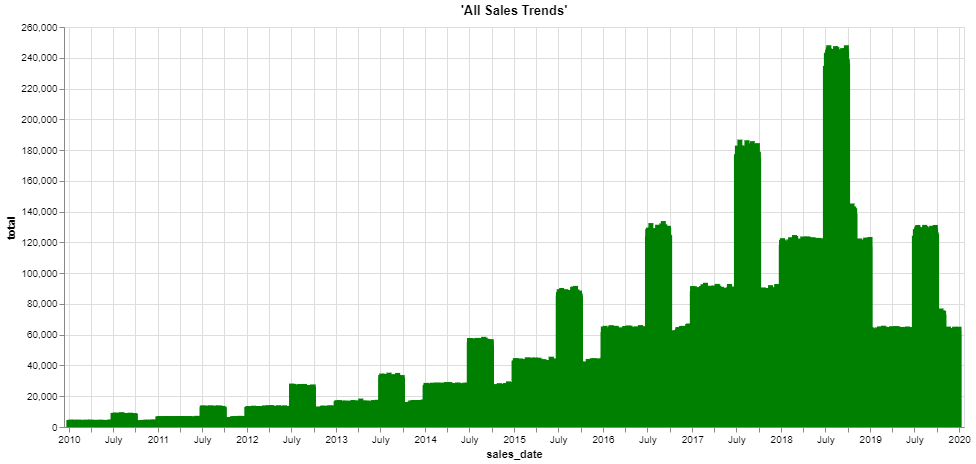

In [22]:
%chart sales_date, total, title='All Sales Trends', width=900, height=400, color=green

Now we see that 2019 in the broader context was an off year, we will need to do further digging to see what happened. But thanks to Teradata Vantage we can cost-effectively analyse all our data by offloading the colder less queried data to object storage for safe keeping.

#### Step 5: Clean-up

Drop the objects we created in our own database schema.

In [23]:
DROP VIEW sales_fact_all

Success: 13 rows affected

In [24]:
DROP VIEW sales_fact_offload_v

Success: 15 rows affected

In [25]:
DROP TABLE sales_fact_offload

Success: 28 rows affected

## Dataset
***

The <b>sales_fact</b> dataset has approximately 43 million rows of sample sales data:

- `sales_date`: date the order was processed
- `customer_id`: customer identifier
- `store_id`: store identifier where the order was taken
- `basket_id`: grouping or order number
- `product_id`: identifier of the product
- `sales_quantity`: quantity of the product sold
- `discount_amount`: how much of a discount was given on this line item

<footer style="padding:10px;background:#f9f9f9;border-bottom:3px solid #394851">©2020 Teradata. All Rights Reserved</footer>